## Test a Perceptual Phenomenon: Stroop Effect 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline


### Overview

In [2]:
data = pd.read_csv('stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


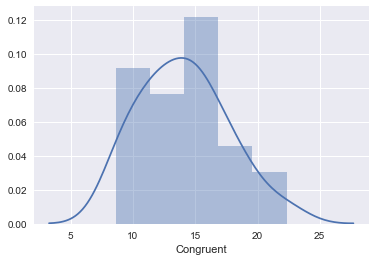

In [3]:
sns.distplot(data['Congruent'])

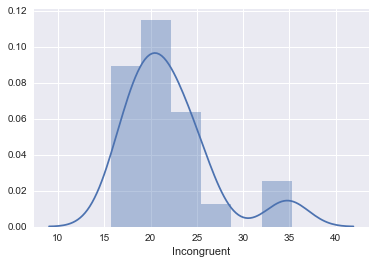

In [4]:
sns.distplot(data['Incongruent'])

### Descriptive Statistics

- The Mean, Std, min, max

In [5]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- The Median

In [11]:
CongruentMedian = np.median(data['Congruent'])
print('The Median of Congruent: ', CongruentMedian)
IncongruentMedian = np.median(data['Incongruent'])
print('The Median of Incongruent: ', IncongruentMedian)

The Median of Congruent:  14.3565
The Median of Incongruent:  21.0175


- The Variance

In [13]:
# numpy calculates the population standard deviation by default.
# To calculate the sample standard deviation, we have to include a parameter: ddof =1

VarianceCongruent = np.var(data['Congruent'], ddof = 1)
print('The Variance of Congruent: ', VarianceCongruent)
VarianceIncongruent = np.var(data['Incongruent'], ddof = 1)
print('The Variance of Incongruent: ', VarianceIncongruent)

The Variance of Congruent:  12.669029070652174
The Variance of Incongruent:  23.011757036231884


- The Skewness

In [14]:
import scipy.stats as sp
CongruentSkew = sp.skew(data['Congruent'])
print('The Skew of Congruent: ', CongruentSkew)
IncongruentSkew = sp.skew(data['Incongruent'])
print('The Skew of Incongruent: ', IncongruentSkew)

The Skew of Congruent:  0.3903776149050634
The Skew of Incongruent:  1.4491357281474857


### Visualizing data distribution 

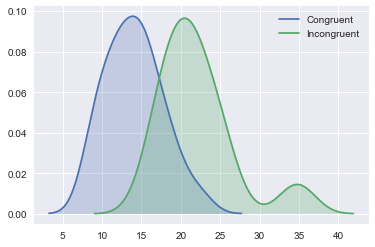

In [15]:
sns.kdeplot(data['Congruent'], shade=True)
sns.kdeplot(data['Incongruent'],shade=True)

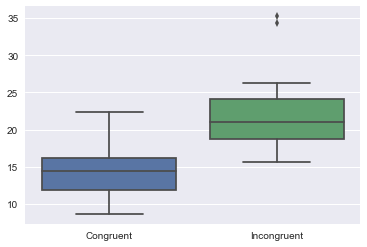

In [16]:
ax = sns.boxplot(data=data)

### Results


- T-statistics and P-value

In [20]:
T_value, P_value = stats.ttest_rel(data['Congruent'],data['Incongruent'])
print('The T-statistics value is: ', T_value)
print('The P-value is: ', P_value)

The T-statistics value is:  -8.02070694411
The P-value is:  4.10300058571e-08


In [21]:
# Create the difference between the two conditions
difference =  data['Congruent'] - data['Incongruent'] 
difference

0     -7.199
1     -1.950
2    -11.650
3     -7.057
4     -8.134
5     -8.640
6     -9.880
7     -8.407
8    -11.361
9    -11.802
10    -2.196
11    -3.346
12    -2.437
13    -3.401
14   -17.055
15   -10.028
16    -6.644
17    -9.790
18    -6.081
19   -21.919
20   -10.950
21    -3.727
22    -2.348
23    -5.153
dtype: float64

In [23]:
DifferenceMean = np.mean(difference)
DifferenceMean

-7.964791666666667

In [28]:
DifferenceStd = np.std(difference)
DifferenceStd

4.762398030222158

- Cohen's D

In [25]:
# For doing a paired t-test, calculate the standard deviation of the differences first 
# and then divide the mean difference with this standard deviation value
# instead of calculating a pooled standard deviation

def CohenEffectSize(group1, group2):

    diff = group1 - group2

    mean_diff = diff.mean()
    var_diff = np.var(diff, ddof = 1)
    std_diff = np.sqrt(var_diff) 

    d = mean_diff / std_diff

    return d

print("Cohen's d = " , CohenEffectSize(data['Congruent'],data['Incongruent']))

Cohen's d =  -1.63721994912


- Confidence Interval
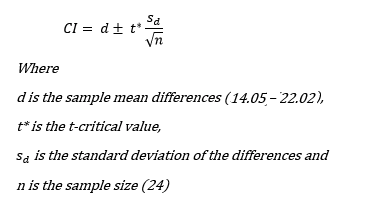

In [30]:
Upperlimit = DifferenceMean + 2.069*(DifferenceStd/np.sqrt(24))
Lowerlimit = DifferenceMean - 2.069*(DifferenceStd/np.sqrt(24))
print('CI: ', Lowerlimit, Upperlimit)

CI:  -9.97610883049 -5.95347450285


- R squared
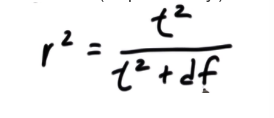

In [34]:
R_squared = T_value**2/(T_value**2 + 23)
print('R_squared is: ', R_squared)

R_squared is:  0.736636416145
